# Lab | Handling Data Imbalance in Classification Models

https://github.com/NicolasVollmer/lab-handling-data-imbalance-classification/blob/master/readme.md

For this lab and in the next lessons we will use the dataset 'Healthcare For All' building a model to predict who will donate (TargetB) and how much they will give (TargetD). You will be using `files_for_lab/learningSet.csv` file which you have already downloaded from class.

### Scenario

You are revisiting the Healthcare for All Case Study. You are provided with this historical data about Donors and how much they donated. Your task is to build a machine learning model that will help the company identify people who are more likely to donate and then try to predict the donation amount.

### Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned in the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe `donors`.
- Check the datatypes of all the columns in the data. 
- Check for null values in the dataframe. Replace the null values using the methods learned in class.
- Split the data into numerical and catagorical.  Decide if any columns need their dtype changed.
  
  - Split the data into a training set and a test set.
  - Scale the features either by using normalizer or a standard scaler.
  - Encode the categorical features using One-Hot Encoding or Ordinal Encoding
  - Fit a logistic regression model on the training data.
  - Check the accuracy on the test data.

**Note**: So far we have not balanced the data.

Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model has changed.


## Imports

In [1]:
# libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [2]:
# numerical and categorical, pre cleaned

numerical = pd.read_csv('/Users/NicolasVollmerMac/Documents/Ironhack-Lessons/7.1 7.2 Data Cleaning and Feature selection Review/numerical7_02.csv')
print(numerical.shape)
categorical = pd.read_csv('/Users/NicolasVollmerMac/Documents/Ironhack-Lessons/7.1 7.2 Data Cleaning and Feature selection Review/categorical7_02.csv')
print(categorical.shape)
targets = pd.read_csv('/Users/NicolasVollmerMac/Documents/Ironhack-Lessons/7.1 7.2 Data Cleaning and Feature selection Review/target7_02.csv')
print(targets.shape)

(95412, 336)
(95412, 13)
(95412, 3)


In [3]:
numerical.drop(columns=numerical.columns[0], axis=1, inplace=True)
categorical.drop(columns=categorical.columns[0], axis=1, inplace=True)
targets.drop(columns=targets.columns[0], axis=1, inplace=True)

In [4]:
numerical.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,ADATE_16,ADATE_18,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.000000,5.0,5.0,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,9503.0,9501.0,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.000000,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9509.0,NaN,9503.0,NaN,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,61.611649,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,2

#### checking for Nans in Numerical

In [5]:
numerical.isna().sum()

ODATEDW     0
TCODE       0
DOB         0
AGE         0
INCOME      0
           ..
AVGGIFT     0
CONTROLN    0
HPHONE_D    0
RFA_2F      0
CLUSTER2    0
Length: 335, dtype: int64

In [6]:
# checking NaNs only for those cols with more than 0 using a quick function

def nan_check(data):
    null = pd.DataFrame(data.isna().sum()).reset_index()
    null.columns = ['column', 'null']
    null = null[null['null']!=0]
    return null

nan_check(numerical)

,column,null
302,ADATE_3,1950
303,ADATE_4,2191
304,ADATE_6,3557
305,ADATE_7,8874
306,ADATE_8,3511
307,ADATE_9,11245
308,ADATE_11,10422
309,ADATE_12,8923
310,ADATE_14,18867
311,ADATE_16,20364


I believe we had meant to drop the adate cols in the corresponding lesson/lab what I somehow appear to have skipped. Will drop them now.

I also believe we were supposed to fill the Nans in Timelag - not sure why that didn't save to the CSV

In [7]:
numerical['TIMELAG'].median()

6.0

In [8]:
numerical['TIMELAG'].fillna((numerical['TIMELAG'].median()), inplace=True)

In [9]:
# creating drop list

drop_list = []
for i in numerical.columns:
    if 'ADATE' in i:
        drop_list.append(i)

In [10]:
numerical = numerical.drop(columns=drop_list)

Not sure what to do with the NEXTDATE col, as it's meaning is not stated in the explanation file that I have. Format may be YYMM. As the actual meaning of the col is not explained in the file I have, I don't know what these values should represent. Given that, I would probably drop it. To fill the few NaNs I would use the mode

In [11]:
numerical['NEXTDATE'].sort_values().unique()

array([7211., 7401., 7403., 7408., 7703., 7705., 7711., 7804., 7809.,
       7810., 7907., 7910., 8005., 8011., 8012., 8104., 8105., 8107.,
       8110., 8111., 8112., 8203., 8204., 8205., 8207., 8208., 8211.,
       8212., 8303., 8304., 8306., 8307., 8309., 8401., 8402., 8403.,
       8405., 8406., 8407., 8408., 8409., 8410., 8411., 8412., 8501.,
       8502., 8505., 8506., 8507., 8508., 8509., 8510., 8511., 8512.,
       8601., 8602., 8603., 8604., 8605., 8606., 8607., 8608., 8609.,
       8610., 8611., 8612., 8701., 8702., 8703., 8704., 8705., 8706.,
       8707., 8708., 8709., 8710., 8711., 8712., 8801., 8802., 8803.,
       8804., 8805., 8806., 8807., 8808., 8809., 8810., 8811., 8812.,
       8901., 8902., 8903., 8904., 8905., 8906., 8907., 8908., 8909.,
       8910., 8911., 8912., 9001., 9002., 9003., 9004., 9005., 9006.,
       9007., 9008., 9009., 9010., 9011., 9012., 9101., 9102., 9103.,
       9104., 9105., 9106., 9107., 9108., 9109., 9110., 9111., 9112.,
       9201., 9202.,

In [12]:
numerical['NEXTDATE'].fillna((numerical['NEXTDATE'].mode()[0]), inplace=True)

In [13]:
nan_check(numerical)

,column,null


Checking Categoricals

In [14]:
nan_check(categorical)

,column,null
5,SOLIH,89212
6,VETERANS,84986


Checking Solih - according to the about file it is the solicitation limit with a val of either 'can be mailed (Default)' (I guess anytime), 0, 1, 2, 3, 4, 5, 6, or 12

In [15]:
categorical.SOLIH.value_counts(dropna=False)

NaN     89212
12.0     5693
0.0       296
1.0        94
2.0        75
3.0        19
4.0        16
6.0         7
Name: SOLIH, dtype: int64

from the val counts I see that all vals are present but 5 and 'can be mailed', given that NaNs make the highest value count while apart from 12 the other values are of decreasing importaince I am making the assumption that the NaNs are not meant to represent 5, but the default 'can be mailed' stat. In order to represent that value I will assign a new number outside the 12 month standard to set it apart: 13

In [16]:
categorical['SOLIH'].fillna(13.0, inplace=True)

checking veterans next: according to the about file this is a simple VETERANS (Y/N) cell and we can see that NaNs must mean the missing N Value

In [17]:
categorical.VETERANS.value_counts(dropna=False)

NaN    84986
Y      10426
Name: VETERANS, dtype: int64

In [18]:
categorical['VETERANS'].fillna('N', inplace=True)

Also checking dtypes, I see that not all are string - will make a conversion 

In [19]:
categorical.dtypes

STATE        object
CLUSTER       int64
HOMEOWNR     object
GENDER       object
DATASRCE      int64
SOLIH       float64
VETERANS     object
RFA_2R       object
RFA_2A       object
GEOCODE2     object
DOMAIN_A     object
DOMAIN_B      int64
dtype: object

In [20]:
categorical = categorical.applymap(str)

In [21]:
categorical.dtypes

STATE       object
CLUSTER     object
HOMEOWNR    object
GENDER      object
DATASRCE    object
SOLIH       object
VETERANS    object
RFA_2R      object
RFA_2A      object
GEOCODE2    object
DOMAIN_A    object
DOMAIN_B    object
dtype: object

not sure why that added a Unnamed: 0 col. Will drop it

In [22]:
categorical.drop(columns=categorical.columns[0], axis=1, inplace=True)

In [23]:
categorical.dtypes

CLUSTER     object
HOMEOWNR    object
GENDER      object
DATASRCE    object
SOLIH       object
VETERANS    object
RFA_2R      object
RFA_2A      object
GEOCODE2    object
DOMAIN_A    object
DOMAIN_B    object
dtype: object

#### Train/Test Split

In [24]:
# concat num and cat to x, extract target b to y, then traintest split

X = pd.concat([numerical, categorical], axis = 1)
y = targets['TARGET_B']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

In [25]:
# split tain and test sets by num and cat vals

X_train_num = X_train.select_dtypes(np.number) 
X_train_cat = X_train.select_dtypes(object)
X_test_num = X_test.select_dtypes(np.number)
X_test_cat  = X_test.select_dtypes(object)

#### Encoding and Normalising

In [26]:
# OneHot Encoding of categorical values below

def cat_encode(data, _onehotencoder):

    encoded = _onehotencoder.transform(data).toarray()
    cols = _onehotencoder.get_feature_names_out(input_features=data.columns)
    
    # Returning a complete encoded categorical dataset
    return pd.DataFrame(encoded, columns=cols).reset_index(drop=True)

onehotencoder = OneHotEncoder(drop='first', handle_unknown = 'ignore').fit(X_train_cat)

X_train_cat_encoded = cat_encode(X_train_cat, onehotencoder).reset_index(drop = True)
X_test_cat_encoded = cat_encode(X_test_cat, onehotencoder).reset_index(drop = True)

In [27]:
# MinMax Transformation of numerical values below

transformer = MinMaxScaler().fit(X_train_num)

X_train_num_scaled = pd.DataFrame(transformer.transform(X_train_num), columns = X_train_num.columns)
X_test_num_scaled = pd.DataFrame(transformer.transform(X_test_num), columns = X_test_num.columns)

In [28]:
# Concatenating transformed and encoded test and train DFs

X_train_scaled = pd.concat([X_train_cat_encoded, X_train_num_scaled], axis = 1)
X_test_scaled = pd.concat([X_test_cat_encoded, X_test_num_scaled], axis = 1)

In [29]:
# resetting indices for y DFs

y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

#### Modeling 

In [30]:
LR = LogisticRegression(random_state=0, solver= 'saga', multi_class='multinomial').fit(X_train_scaled, y_train)

/Users/NicolasVollmerMac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [31]:
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.0
recall:  0.0
f1:  0.0


/Users/NicolasVollmerMac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
accuracy_score(y_test,pred)

0.9496499392110007

In [33]:
confusion_matrix(y_test,pred)

array([[22652,     0],
       [ 1201,     0]])

#### Linear Regression Conclusions:
Not sure what to make of my linear regression model, it took me quite a while to get any results out of this as the standard lfbqs solver didn't work with the data I handed it - even the saga solver cannot converge and thus no precision, recall or f1 scores were given. Also the confusion matrix score is terrible. 

From this I suppose that the data is really terribly unbalanced!

#### Checking for Imbalance

the answer must be in target B, lets visualise it:

In [34]:
# concatenating train data, dividing the data with actual donations vs the data without

trainset = pd.concat([X_train_scaled, y_train], axis = 1)

train_1 = trainset[trainset['TARGET_B'] == 1]
train_0 = trainset[trainset['TARGET_B'] == 0]

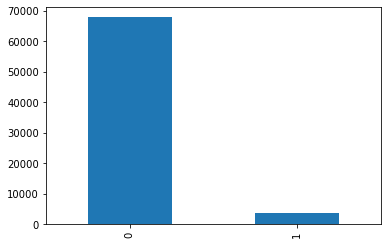

In [35]:
# visualising imbalance of Target B, aka donations vs non-donations

ax = trainset['TARGET_B'].value_counts().plot(kind='bar')
plt.show()

#### Oversampling

In [37]:
upsample = resample(train_1, replace=True, n_samples = len(train_0))
train_1_upsampled = pd.concat([upsample, train_0], axis=0)

train_1_upsampled.shape

(135834, 401)

Re-Running model with upsampled data

In [38]:
X_up = train_1_upsampled.drop(columns=['TARGET_B'])
y_up = train_1_upsampled['TARGET_B']

In [39]:
LR_up = LogisticRegression(random_state=0, solver= 'saga', multi_class='multinomial').fit(X_up, y_up)

/Users/NicolasVollmerMac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [40]:
pred_up = LR_up.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred_up))
print("recall: ",recall_score(y_test,pred_up))
print("f1: ",f1_score(y_test,pred_up))

precision:  0.06858071505958829
recall:  0.5270607826810991
f1:  0.12136899626114465


In [41]:
accuracy_score(y_test,pred_up)

0.6157716010564709

In [42]:
confusion_matrix(y_test,pred_up)

array([[14055,  8597],
       [  568,   633]])

#### Undersampling

In [46]:
downsample = resample(train_0, replace=True, n_samples = len(train_1))
train_down = pd.concat([downsample, train_1], axis=0)

train_down.shape

(7284, 401)

Re-Running model with downsampled data

In [47]:
X_down = train_down.drop(columns=['TARGET_B'])
y_down = train_down['TARGET_B']

In [48]:
LR_down = LogisticRegression(random_state=0, solver= 'saga', multi_class='multinomial').fit(X_down, y_down)

/Users/NicolasVollmerMac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [50]:
pred_down = LR_down.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred_down))
print("recall: ",recall_score(y_test,pred_down))
print("f1: ",f1_score(y_test,pred_down))

precision:  0.06556892131729442
recall:  0.5537052456286428
f1:  0.11725293132328307


In [51]:
accuracy_score(y_test,pred_down)

0.5802205173353456

In [52]:
confusion_matrix(y_test,pred_down)

array([[13175,  9477],
       [  536,   665]])

#### SMOTE

In [55]:
smote = SMOTE(random_state=100, k_neighbors=3)
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)

In [57]:
LR_smote = LogisticRegression(random_state=0, solver= 'saga', multi_class='multinomial').fit(X_smote, y_smote)

/Users/NicolasVollmerMac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [58]:
pred_smote = LR_smote.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred_smote))
print("recall: ",recall_score(y_test,pred_smote))
print("f1: ",f1_score(y_test,pred_smote))

precision:  0.06740605146979649
recall:  0.5212323064113239
f1:  0.11937452326468345


In [59]:
accuracy_score(y_test,pred_smote)

0.6127950362637823

In [60]:
confusion_matrix(y_test,pred_smote)

array([[13991,  8661],
       [  575,   626]])

#### Final Conclusions

Resampling certainly helped to get actual results, but these results are terrible. None of the techniques, up and downsampling or SMOTE helped etch out a workable result.